In [245]:
import geopandas as gpd
import pandas as pd

In [246]:
# Функция для сериализации точек
def getPoint(arr):
    return '[ {0:.6f}, {1:.6f} ]'.format(arr[0], arr[1])

## arhangelskaya_oblast

Данный файл явялется мультполигоном предсталяющим границы четырёх внутренних районов.
Его пока в `CSV` переводить не будем.

In [110]:
arhangelskaya_oblast = gpd.read_file('data/arhangelskaya_oblast.geojson')
data = arhangelskaya_oblast

In [111]:
data

,region,id_full,level,type,name,id,geometry
0,Архангельская область,3,2,Область,Архангельская,144105,"MULTIPOLYGON (((6752340.851 16757142.533, 6747..."


<AxesSubplot:>

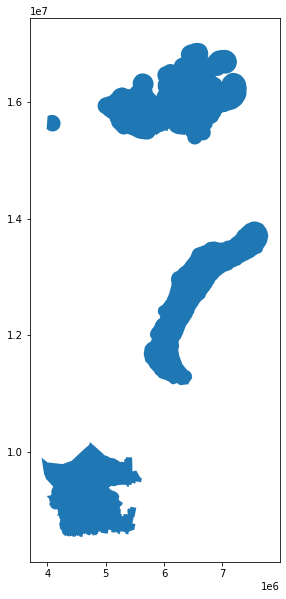

In [112]:
data.plot(figsize=(10,10))

## auto_foot_graph_arh_obl

In [113]:
auto_foot_graph_arh_obl = gpd.read_file('data/auto_foot_graph_arh_obl.geojson')
data = auto_foot_graph_arh_obl

In [114]:
data.head(3)

,OBJECTID,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,auto,foot,meters,minutes,minutes_foot,geometry
0,29271,bridleway,,,B,0,0.0,F,F,N,Y,2060.383262,NaN,27.471777,"MULTILINESTRING ((5087051.262 9580496.953, 508..."
1,37927,bridleway,,,B,0,0.0,F,F,N,Y,1947.084932,NaN,25.961132,"MULTILINESTRING ((5088103.332 9578659.179, 508..."
2,37987,bridleway,,,B,0,0.0,F,F,N,Y,161.128041,NaN,2.148374,"MULTILINESTRING ((4435275.477 9470298.986, 443..."


<AxesSubplot:>

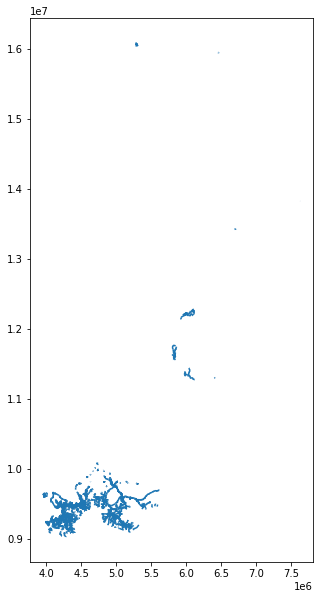

In [126]:
data.plot(figsize=(10,10))

### Рисуем конкретную дорогу с идентификатором 29271

<AxesSubplot:>

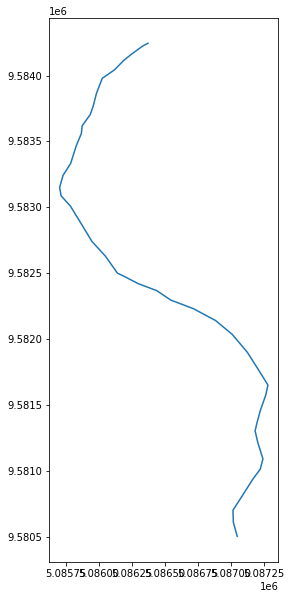

In [127]:
data[data.OBJECTID == 29271].plot(figsize=(10,10))

In [128]:
# Выборка по ID объектов
data.OBJECTID

0          29271
1          37927
2          37987
3          37993
4          38156
           ...  
103344    861098
103345    861099
103346    861100
103347    861101
103348    861102
Name: OBJECTID, Length: 103349, dtype: int64

### Предполагаем, что все кривые в одинаковом формате

Формат предположительно: [ [ [x, y], [x, y], [x, y] ... ] ]

In [247]:
data.to_csv('data/auto_foot_graph_arh_obl.csv', index=False)

In [237]:
all_res = []

def convertAutoFootGraphLense(objectid):
    obj = data[data.OBJECTID == objectid]
    for _, row in obj.iterrows():
        mls = row.geometry
        for coords in seq:
            x, y = coords.xy
            coords = pd.DataFrame()
            coords['x'] = x
            coords['y'] = y
            coords['curve'] = coords.apply(lambda row: getPoint(row), axis=1)
            curveArr = []
            for _, curve in coords.iterrows():
                curveArr.append(curve['curve'])
            curve = ', '.join(curveArr)
            curve = '[[ {0} ]]'.format(curve)
            
            
            obj = {}
            obj['objectid'] = objectid
            obj['curve'] = curve

            obj['fclass'] = row.fclass
            obj['name'] = row.name
            obj['ref'] = row.ref
            obj['oneway'] = row.oneway
            obj['maxspeed'] = row.maxspeed
            obj['layer'] = row.layer
            obj['bridge'] = row.bridge
            obj['tunnel'] = row.tunnel
            obj['auto'] = row.auto
            obj['foot'] = row.foot
            obj['meters'] = row.meters
            obj['minutes'] = row.minutes
            obj['minutes_foot'] = row.minutes_foot

            all_res.append(obj)

objectids = data.OBJECTID
#objectids = [ 29271 ]
for objectid in objectids:
    convertAutoFootGraphLense(objectid)

auto_foot_lense_df = pd.DataFrame(all_res)
data = auto_foot_lense_df
data

,objectid,curve,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,auto,foot,meters,minutes,minutes_foot
0,29271,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",bridleway,0,,B,0,0.0,F,F,N,Y,2060.383262,NaN,27.471777
1,37927,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",bridleway,1,,B,0,0.0,F,F,N,Y,1947.084932,NaN,25.961132
2,37987,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",bridleway,2,,B,0,0.0,F,F,N,Y,161.128041,NaN,2.148374
3,37993,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",bridleway,3,,B,0,0.0,F,F,N,Y,187.667672,NaN,2.502236
4,38156,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",bridleway,4,,B,0,0.0,F,F,N,Y,64415.091319,NaN,858.867884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103344,861098,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",unclassified,103344,,B,60,0.0,F,F,Y,Y,429.384133,0.429384,NaN
103345,861099,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",unclassified,103345,,B,60,0.0,F,F,Y,Y,1060.710825,1.060711,NaN
103346,861100,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",unclassified,103346,,B,60,0.0,F,F,Y,Y,795.592793,0.795593,NaN
103347,861101,"[[ [ 5087051.262300, 9580496.953200 ], [ 50870...",unclassified,103347,,B,60,0.0,F,F,Y,Y,2551.855248,2.551855,NaN


In [243]:
data.to_csv('data/auto_foot_graph_arh_obl_lense.csv', index=False)

In [252]:
all_res = []

def convertAutoFootGraphLenseRaw(objectid):
    obj = data[data.OBJECTID == objectid]
    for _, row in obj.iterrows():
        mls = row.geometry
        for coords in seq:
            x, y = coords.xy
            coords = pd.DataFrame()
            coords['x'] = x
            coords['y'] = y
            coords['curve'] = coords.apply(lambda row: [row[0], row[1]], axis=1)
            #print(coords)
            curveArr = []
            for _, curve in coords.iterrows():
                curveArr.append(curve['curve'])
            #curve = ', '.join(curveArr)
            #curve = '[[ {0} ]]'.format(curve)

            obj = {}
            obj['objectid'] = objectid
            obj['curve'] = [curveArr]

            obj['fclass'] = row.fclass
            obj['name'] = row.name
            obj['ref'] = row.ref
            obj['oneway'] = row.oneway
            obj['maxspeed'] = row.maxspeed
            obj['layer'] = row.layer
            obj['bridge'] = row.bridge
            obj['tunnel'] = row.tunnel
            obj['auto'] = row.auto
            obj['foot'] = row.foot
            obj['meters'] = row.meters
            obj['minutes'] = row.minutes
            obj['minutes_foot'] = row.minutes_foot

            all_res.append(obj)

data = auto_foot_graph_arh_obl
objectids = data.OBJECTID
#objectids = [ 29271 ]
for objectid in objectids:
    convertAutoFootGraphLenseRaw(objectid)

auto_foot_lense_raw_df = pd.DataFrame(all_res)
data = auto_foot_lense_raw_df
data

,objectid,curve,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,auto,foot,meters,minutes,minutes_foot
0,29271,"[[[5087051.2623, 9580496.953199998], [5087020....",bridleway,0,,B,0,0.0,F,F,N,Y,2060.383262,NaN,27.471777
1,37927,"[[[5087051.2623, 9580496.953199998], [5087020....",bridleway,1,,B,0,0.0,F,F,N,Y,1947.084932,NaN,25.961132
2,37987,"[[[5087051.2623, 9580496.953199998], [5087020....",bridleway,2,,B,0,0.0,F,F,N,Y,161.128041,NaN,2.148374
3,37993,"[[[5087051.2623, 9580496.953199998], [5087020....",bridleway,3,,B,0,0.0,F,F,N,Y,187.667672,NaN,2.502236
4,38156,"[[[5087051.2623, 9580496.953199998], [5087020....",bridleway,4,,B,0,0.0,F,F,N,Y,64415.091319,NaN,858.867884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103344,861098,"[[[5087051.2623, 9580496.953199998], [5087020....",unclassified,103344,,B,60,0.0,F,F,Y,Y,429.384133,0.429384,NaN
103345,861099,"[[[5087051.2623, 9580496.953199998], [5087020....",unclassified,103345,,B,60,0.0,F,F,Y,Y,1060.710825,1.060711,NaN
103346,861100,"[[[5087051.2623, 9580496.953199998], [5087020....",unclassified,103346,,B,60,0.0,F,F,Y,Y,795.592793,0.795593,NaN
103347,861101,"[[[5087051.2623, 9580496.953199998], [5087020....",unclassified,103347,,B,60,0.0,F,F,Y,Y,2551.855248,2.551855,NaN


In [253]:
data.to_csv('data/auto_foot_graph_arh_obl_lense_raw.csv', index=False)

In [ ]:
all_res = []

def convertAutoFootGraphDB(objectid):
    obj = data[data.OBJECTID == objectid]
    for _, row in obj.iterrows():
        mls = row.geometry
        for coords in seq:
            x, y = coords.xy
            obj = pd.DataFrame()
            obj['x'] = x
            obj['y'] = y
            #coords['curve'] = coords.apply(lambda row: [row[0], row[1]], axis=1)
            #print(coords)
            #curveArr = []
            #for _, curve in coords.iterrows():
            #    curveArr.append(curve['curve'])
            #curve = ', '.join(curveArr)
            #curve = '[[ {0} ]]'.format(curve)

            obj['objectid'] = objectid
            obj['curve'] = [curveArr]

            obj['fclass'] = row.fclass
            obj['name'] = row.name
            obj['ref'] = row.ref
            obj['oneway'] = row.oneway
            obj['maxspeed'] = row.maxspeed
            obj['layer'] = row.layer
            obj['bridge'] = row.bridge
            obj['tunnel'] = row.tunnel
            obj['auto'] = row.auto
            obj['foot'] = row.foot
            obj['meters'] = row.meters
            obj['minutes'] = row.minutes
            obj['minutes_foot'] = row.minutes_foot

            all_res.append(obj)

data = auto_foot_graph_arh_obl
objectids = data.OBJECTID
#objectids = [ 29271 ]
for objectid in objectids:
    convertAutoFootGraphLenseRaw(objectid)

auto_foot_lense_raw_df = pd.DataFrame(all_res)
data = auto_foot_lense_raw_df
data

## objects_education

In [254]:
objects_education = gpd.read_file('data/objects_education.geojson')
data = objects_education

In [255]:
data.head(3)

,id,name,city,street,house,post,x,y,geometry
0,224,Северный (Арктический) федеральный университет...,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,39.780599,64.557914,POINT (4428356.041 9492875.908)
1,275,Средняя школа №23 им. А.С. Пушкина,Архангельск,Федота Шубина,7 к1,163001,40.525761,64.557264,POINT (4511307.126 9492707.399)
2,1874,Архангельский областной институт открытого обр...,Архангельск,Ломоносова проспект,270,163001,40.535336,64.559314,POINT (4512372.960 9493238.741)


In [256]:
data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [258]:
data = data.to_crs('WGS84')

In [259]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [260]:
data.head(3)

,id,name,city,street,house,post,x,y,geometry
0,224,Северный (Арктический) федеральный университет...,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,39.780599,64.557914,POINT (39.78060 64.55791)
1,275,Средняя школа №23 им. А.С. Пушкина,Архангельск,Федота Шубина,7 к1,163001,40.525761,64.557264,POINT (40.52576 64.55726)
2,1874,Архангельский областной институт открытого обр...,Архангельск,Ломоносова проспект,270,163001,40.535336,64.559314,POINT (40.53534 64.55931)


<AxesSubplot:>

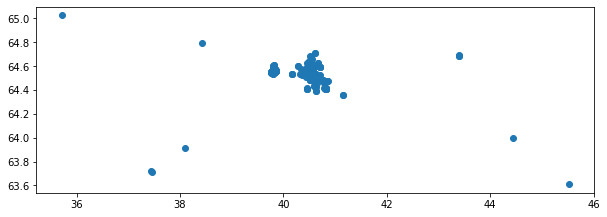

In [261]:
data.plot(figsize=(10,10))

In [262]:
data[data.id == 224]

,id,name,city,street,house,post,x,y,geometry
0,224,Северный (Арктический) федеральный университет...,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,39.780599,64.557914,POINT (39.78060 64.55791)


In [274]:
all_res = []

def convertObjectsEducationLense(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        obj = {}
        obj['id'] = objectid
        obj['name'] = row.name

        obj['city'] = row.city
        obj['street'] = row.street
        obj['house'] = row.house
        obj['post'] = row.post
        #print(str([row['x'], row['y']]))
        #obj['coords'] = "GEOPOINT({0})".format(str([row['x'], row['y']]))
        obj['coords'] = [row['y'], row['x']]

        all_res.append(obj)

data = objects_education
objectids = data.id
#objectids = [ 224 ]
for objectid in objectids:
    convertObjectsEducationLense(objectid)

objects_education_df = pd.DataFrame(all_res)
data = objects_education_df
data

,id,name,city,street,house,post,coords
0,224,0,Северодвинск (Северодвинск городской округ),Карла Маркса,36а,164512,"[64.55791398, 39.78059915]"
1,275,1,Архангельск,Федота Шубина,7 к1,163001,"[64.55726367, 40.52576143]"
2,1874,2,Архангельск,Ломоносова проспект,270,163001,"[64.55931417, 40.53533598]"
3,1912,3,Архангельск,Клепача,3,163039,"[64.43169736, 40.61717154]"
4,3241,4,Архангельск,Урицкого,68 к3,163060,"[64.53944863, 40.57454813]"
...,...,...,...,...,...,...,...
480,206955,480,,,,,"[63.7174921, 37.4475349]"
481,206958,481,,,,,"[63.7131966, 37.4545795]"
482,210104,482,,,,,"[64.0016939, 44.4442573]"
483,211250,483,,,,,"[65.0268243, 35.7154233]"


In [275]:
data.to_csv('data/objects_education_lense.csv', index=False)